In [74]:
from PerceptronREG import PerceptronREG
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [75]:
df = pd.read_csv('ionosphere.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [76]:
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [77]:
le.classes_ # array position == label

array(['b', 'g'], dtype=object)

In [78]:
X = df.drop(34, axis=1)
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(280, 34) (71, 34)


In [85]:
p_no_reg = PerceptronREG()
p_no_reg.fit(X_train, y_train)
y_pred_no_reg = p_no_reg.predict(X_test)
accuracy_score(list(y_test), y_pred_no_reg)

0.8591549295774648

In [86]:
p_w_reg = PerceptronREG(alpha=0.01) # l2 reg
p_w_reg.fit(X_train, y_train)
y_pred_w_reg = p_w_reg.predict(X_test)
accuracy_score(list(y_test), y_pred_w_reg)

0.8028169014084507

Extracting insight

In [87]:
def plot_confusion_matrix(model, y_pred, y_test, ax=None):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')
    print(f'Acurácia = {accuracy_score(list(y_test), y_pred)}')

Acurácia = 0.8591549295774648
Acurácia = 0.8028169014084507


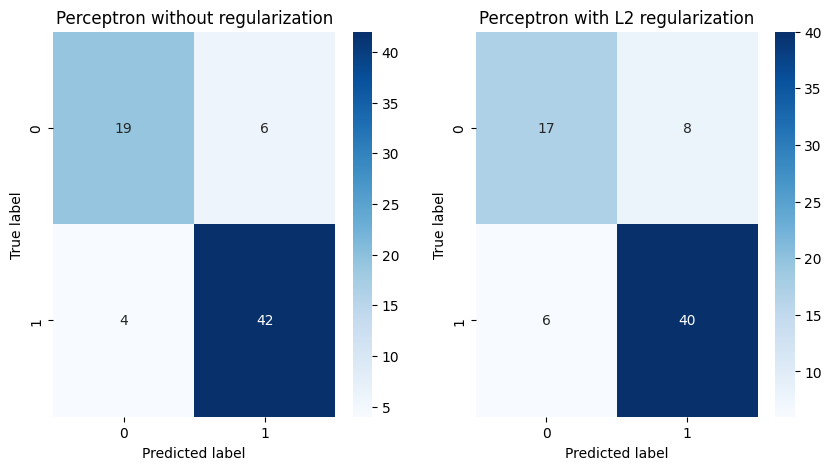

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plot_confusion_matrix(p_no_reg, y_pred_no_reg, list(y_test), ax=axs[0])
axs[0].set_title('Perceptron without regularization')
plot_confusion_matrix(p_w_reg, y_pred_w_reg, list(y_test), ax=axs[1])
axs[1].set_title('Perceptron with L2 regularization')
plt.show()

In [95]:
def plot_lr_curve(models, X_train_samples, X_test_samples):
    X_train, y_train = X_train_samples
    X_test, y_test = X_test_samples
    train_acc, test_acc = [], []

    fig, axs = plt.subplots(nrows=1, ncols=len(models), figsize=(15,5))

    sizes = np.linspace(0.1, 1.0, 10)
    for i, model in enumerate(models):
        train_acc = []
        test_acc = []
        for size in sizes:
            size = int(size * len(X_train))
            model.fit(X_train[:size], y_train[:size])
            y_train_pred = model.predict(X_train[:size])
            y_test_pred = model.predict(X_test)
            train_acc.append(accuracy_score(list(y_train[:size]), y_train_pred))
            test_acc.append(accuracy_score(list(y_test), y_test_pred))

        axs[i].plot(sizes, train_acc, label='Training accuracy')
        axs[i].plot(sizes, test_acc, label='Testing accuracy')
        axs[i].set_xlabel('Training set size')
        axs[i].set_ylabel('Accuracy')
        axs[i].legend()
    axs[0].set_title('No regularization')
    axs[1].set_title('With L2 regularization')

    plt.tight_layout()
    plt.show()

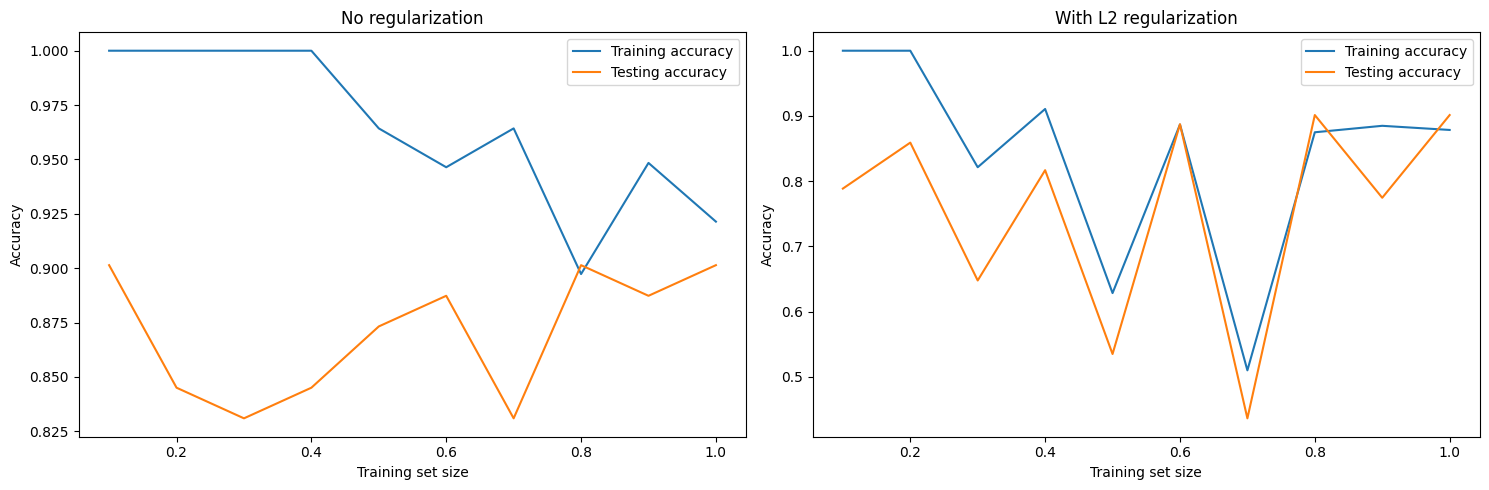

In [96]:
plot_lr_curve((p_no_reg, p_w_reg), (X_train, y_train), (X_test, y_test))